# Notebook for cross-testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.io import read_image,ImageReadMode
from torch.utils.data import Dataset
import torchvision.transforms.v2 as transforms
import sys
from PIL import Image
import os

import torch.nn as nn
import torch.optim as optim
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.transforms import v2 as transforms


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cpu')

In [3]:
cdir = !pwd
rc = 'local' if 'dg' in cdir[0] else 'colab'
if rc == 'colab':
    !echo 'COL'
else:
    !echo 'Loc'


Loc


In [4]:
# Colab dir setup and extract
untar = 'cub_bbs'
if rc == 'colab':
    from google.colab import drive
    drive.mount('/content/gdrive/')
    if untar == 'cub':
      !tar -xvf '/content/gdrive/MyDrive/Colab Notebooks/CUB_200_2011.tgz' -C /content | tail
    if untar == 'cub_sm':
      !tar -xvf '/content/gdrive/MyDrive/Colab Notebooks/CUB_sm.tar' -C /content | tail
    if untar == 'cub_bbs':
      !tar -xzvf '/content/gdrive/MyDrive/Colab Notebooks/CUB_200_2011_bbs.tgz' -C /content | tail
    if untar == 'nab_sm':
      !tar -xzvf '/content/gdrive/MyDrive/Colab Notebooks/nabirds_sm.tgz' -C /content | tail
    if untar == 'nab_bbs':
      !tar -xzvf '/content/gdrive/MyDrive/Colab Notebooks/nabirds_bbs.tgz' -C /content | tail
      !tar -xvf '/content/gdrive/MyDrive/Colab Notebooks/CUBtxt.tar' -C /content | tail
    sys.path.append('/content/gdrive/MyDrive')



In [5]:
from pathlib import Path
if rc == 'colab':
    datadir = Path('/content')
    untar = 'CUB'
    if untar == 'nab':
      CUBDir = Path('/content/CUB_200_2011/CUB_200_2011/')
    if untar == 'smcub':
      CUBDir = Path('/content/CUB_200_2011/')
    expdir = Path('/content/gdrive/MyDrive/birddb/expts')
    sys.path.append('/content/gdrive/MyDrive/birddb/src')
else:
    datadir = Path('/data1/datasets/birds')
    expdir = Path('/home/dg/proj/birddb/expts')
    sys.path.append('/home/dg/proj/birddb/src')


In [6]:
import birddb
import trainer
import models
import expt

In [7]:

dbname = 'nab_wood_sm'
tdbdir = Path(datadir / dbname)
trainds = birddb.TrainImageDataset(tdbdir)
testds = birddb.TestImageDataset(tdbdir,trainds)

In [8]:
import importlib
importlib.reload(expt)
from torch.utils.tensorboard import SummaryWriter
#writer = SummaryWriter(expdir / 'stats')
myexpt = expt.Expt_RN50_V1_T2(expdir,datadir,dbname,device)
model = myexpt.loadModel()
# note - makeDataloader always adds resize transform

In [9]:
df = myexpt.crossTest(['CUB_wood_sm','nab_wood_sm'])

df

train not in stats[CUB_wood_sm]...computing
14 Classes
90 Images
90 Labels
Ave images per class: 58.0
db: CUB_wood_sm, test: train
Loss: 0.4217 Acc: 0.9111
Testing complete in 0m 4s
test not in stats[CUB_wood_sm]...computing
14 Classes
90 Images
90 Labels
Ave images per class: 58.0
db: CUB_wood_sm, test: test
Loss: 0.4523 Acc: 0.8556
Testing complete in 0m 4s
train not in stats[nab_wood_sm]...computing
14 Classes
709 Images
709 Labels
Ave images per class: 102.42857142857143
db: nab_wood_sm, test: train
Loss: 0.0110 Acc: 0.9986
Testing complete in 0m 32s
test not in stats[nab_wood_sm]...computing
14 Classes
725 Images
725 Labels
Ave images per class: 102.42857142857143
db: nab_wood_sm, test: test
Loss: 0.9323 Acc: 0.7448
Testing complete in 0m 32s
nab_wood_sm
{'CUB_wood_sm': {'train': 0.9111111111111111, 'test': 0.8555555555555555}, 'nab_wood_sm': {'train': 0.998589562764457, 'test': 0.7448275862068966}}
CUB_wood_sm
{'CUB_wood_sm': {'train': 0.994413407821229, 'test': 0.917159763313609

,traindb,testdb,trainacc,testacc
0,nab_wood_sm,CUB_wood_sm,0.911111,0.855556
1,nab_wood_sm,nab_wood_sm,0.998590,0.744828
2,CUB_wood_sm,CUB_wood_sm,0.994413,0.917160
3,CUB_wood_sm,nab_wood_sm,0.822464,0.832117


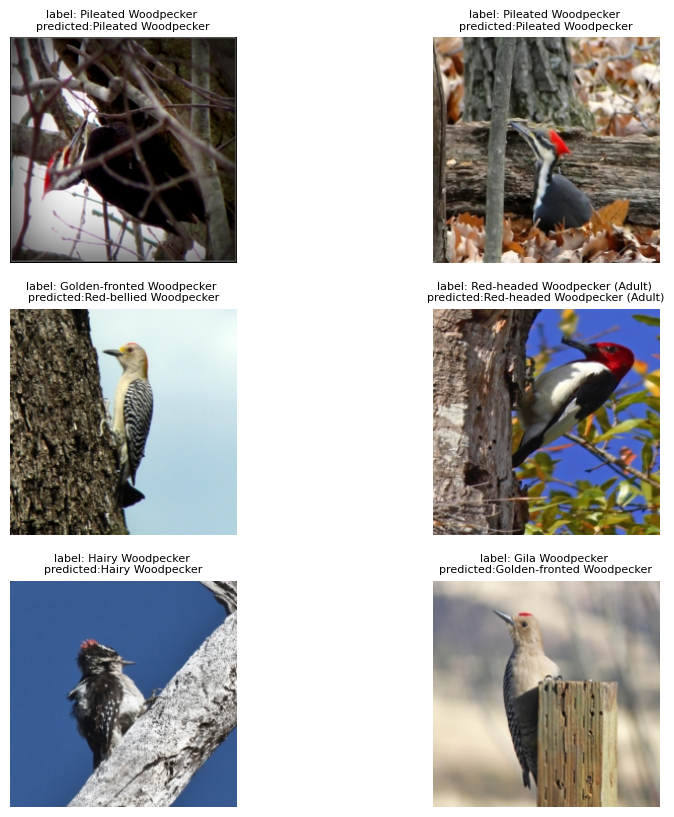

In [10]:
myexpt.visualizeOnDataset(testds)


In [ ]:
myexpt.testOnDataset(testds)
